# Formative Assignment: Advanced Linear Algebra (PCA)
This notebook will guide you through the implementation of Principal Component Analysis (PCA). Fill in the missing code and provide the required answers in the appropriate sections. You will work with a dataset that is Africanized .

Make sure to display outputs for each code cell when submitting.

In [2]:
# Import required libraries
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Download latest version of global health statistics dataset
path = kagglehub.dataset_download("malaiarasugraj/global-health-statistics")
print("Path to dataset files:", path)

# Load the dataset
import os
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
print("Available CSV files:", csv_files)

# Load the main dataset
data_file = os.path.join(path, csv_files[0])  # Use the first CSV file
df = pd.read_csv(data_file)
print(f"Dataset shape: {df.shape}")
print(f"Dataset columns: {df.columns.tolist()}")
df.head()

Path to dataset files: C:\Users\RAISSA\.cache\kagglehub\datasets\malaiarasugraj\global-health-statistics\versions\1
Available CSV files: ['Global Health Statistics.csv']
Dataset shape: (1000000, 22)
Dataset columns: ['Country', 'Year', 'Disease Name', 'Disease Category', 'Prevalence Rate (%)', 'Incidence Rate (%)', 'Mortality Rate (%)', 'Age Group', 'Gender', 'Population Affected', 'Healthcare Access (%)', 'Doctors per 1000', 'Hospital Beds per 1000', 'Treatment Type', 'Average Treatment Cost (USD)', 'Availability of Vaccines/Treatment', 'Recovery Rate (%)', 'DALYs', 'Improvement in 5 Years (%)', 'Per Capita Income (USD)', 'Education Index', 'Urbanization Rate (%)']
Dataset shape: (1000000, 22)
Dataset columns: ['Country', 'Year', 'Disease Name', 'Disease Category', 'Prevalence Rate (%)', 'Incidence Rate (%)', 'Mortality Rate (%)', 'Age Group', 'Gender', 'Population Affected', 'Healthcare Access (%)', 'Doctors per 1000', 'Hospital Beds per 1000', 'Treatment Type', 'Average Treatment Co

,Country,Year,Disease Name,Disease Category,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Age Group,Gender,Population Affected,...,Hospital Beds per 1000,Treatment Type,Average Treatment Cost (USD),Availability of Vaccines/Treatment,Recovery Rate (%),DALYs,Improvement in 5 Years (%),Per Capita Income (USD),Education Index,Urbanization Rate (%)
0,Italy,2013,Malaria,Respiratory,0.95,1.55,8.42,0-18,Male,471007,...,7.58,Medication,21064,No,91.82,4493,2.16,16886,0.79,86.02
1,France,2002,Ebola,Parasitic,12.46,8.63,8.75,61+,Male,634318,...,5.11,Surgery,47851,Yes,76.65,2366,4.82,80639,0.74,45.52
2,Turkey,2015,COVID-19,Genetic,0.91,2.35,6.22,36-60,Male,154878,...,3.49,Vaccination,27834,Yes,98.55,41,5.81,12245,0.41,40.20
3,Indonesia,2011,Parkinson's Disease,Autoimmune,4.68,6.29,3.99,0-18,Other,446224,...,8.44,Surgery,144,Yes,67.35,3201,2.22,49336,0.49,58.47
4,Italy,2013,Tuberculosis,Genetic,0.83,13.59,7.01,61+,Male,472908,...,5.90,Medication,8908,Yes,50.06,2832,6.93,47701,0.50,48.14


In [3]:
# Explore and prepare the data
print("Dataset info:")
df.info()
print("\nMissing values:")
print(df.isnull().sum())

# Select numerical columns only (more than 10 features)
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nNumerical columns ({len(numerical_cols)}): {numerical_cols}")

# Remove rows with missing values for simplicity
df_clean = df[numerical_cols].dropna()
print(f"\nClean dataset shape: {df_clean.shape}")

# Convert to numpy array for PCA implementation
data = df_clean.values
print(f"Data array shape: {data.shape}")
print(f"\nFirst 5 rows of original data:")
print(data[:5])

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 22 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   Country                             1000000 non-null  object 
 1   Year                                1000000 non-null  int64  
 2   Disease Name                        1000000 non-null  object 
 3   Disease Category                    1000000 non-null  object 
 4   Prevalence Rate (%)                 1000000 non-null  float64
 5   Incidence Rate (%)                  1000000 non-null  float64
 6   Mortality Rate (%)                  1000000 non-null  float64
 7   Age Group                           1000000 non-null  object 
 8   Gender                              1000000 non-null  object 
 9   Population Affected                 1000000 non-null  int64  
 10  Healthcare Access (%)               1000000 non-null  float64
 11

### Step 1: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

STRICTLY - Write code that implements standardization based on the image below

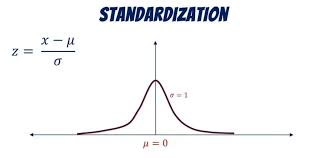


In [4]:
# Step 1: Load and Standardize the data (use of numpy only allowed)
# Calculate mean and standard deviation for each feature
data_mean = np.mean(data, axis=0)
data_std = np.std(data, axis=0)

# Standardization formula: (Data - Data Mean) / Data's Standard Deviation
standardized_data = (data - data_mean) / data_std

print(f"Original data mean: {np.mean(data, axis=0)[:5]}")
print(f"Original data std: {np.std(data, axis=0)[:5]}")
print(f"Standardized data mean: {np.mean(standardized_data, axis=0)[:5]}")
print(f"Standardized data std: {np.std(standardized_data, axis=0)[:5]}")

standardized_data[:5]  # Display the first few rows of standardized data

Original data mean: [2.01199700e+03 1.00479919e+01 7.55500540e+00 5.04991886e+00
 5.00735427e+05]
Original data std: [7.21728301e+00 5.74018648e+00 4.29894458e+00 2.85942510e+00
 2.88659972e+05]
Standardized data mean: [5.57782176e-15 3.75663944e-17 2.61827893e-16 3.08190806e-16
 1.66586744e-17]
Standardized data std: [1. 1. 1. 1. 1.]


array([[ 0.1389721 , -1.58496451, -1.39685574,  1.17858696, -0.1029877 ,
        -1.19475142,  0.45576654,  0.85096063, -0.27400633,  1.22379859,
         1.3808597 , -0.98417607, -1.16354523,  0.96857011,  1.53530912],
       [-1.38514715,  0.42019683,  0.25006012,  1.29399478,  0.46276791,
         0.9851643 , -1.09149905, -0.04955803,  1.58590855,  0.15210468,
        -0.09221046, -0.06321811,  1.05573009,  0.62248266, -0.4682496 ],
       [ 0.4160847 , -1.59193293, -1.21076355,  0.40920154, -1.1981482 ,
        -1.28688005,  1.01770877, -0.6401816 ,  0.19605839,  1.69924355,
        -1.70240704,  0.27954444, -1.32510087, -1.66169455, -0.73143311],
       [-0.13814049, -0.93515984, -0.29425953, -0.37067551, -0.18884304,
         0.70739302,  0.33260112,  1.16450153, -1.72655492, -0.5048995 ,
         0.4860752 , -0.96340258, -0.03394374, -1.10795462,  0.17239449],
       [ 0.1389721 , -1.60586976,  1.40383168,  0.68548085, -0.0964021 ,
        -0.55331451,  1.43339206,  0.23846211, 

### Step 3: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

In [5]:
# Step 3: Calculate the Covariance Matrix
# Covariance matrix formula: (1/(n-1)) * X^T * X where X is centered data
n_samples = standardized_data.shape[0]
cov_matrix = np.dot(standardized_data.T, standardized_data) / (n_samples - 1)

print(f"Covariance matrix shape: {cov_matrix.shape}")
print(f"\nCovariance matrix (first 5x5):")
cov_matrix[:5, :5]

Covariance matrix shape: (15, 15)

Covariance matrix (first 5x5):


array([[ 1.00000100e+00, -8.18147632e-04, -9.43832518e-04,
         4.47732727e-04,  6.85556325e-04],
       [-8.18147632e-04,  1.00000100e+00,  3.38152665e-04,
         1.28380493e-03,  6.21522444e-04],
       [-9.43832518e-04,  3.38152665e-04,  1.00000100e+00,
         3.23081380e-04,  2.33682416e-03],
       [ 4.47732727e-04,  1.28380493e-03,  3.23081380e-04,
         1.00000100e+00, -1.83059529e-03],
       [ 6.85556325e-04,  6.21522444e-04,  2.33682416e-03,
        -1.83059529e-03,  1.00000100e+00]])

### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [6]:
# Step 4: Perform Eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print(f"Number of eigenvalues: {len(eigenvalues)}")
print(f"Number of eigenvectors: {eigenvectors.shape[1]}")
print(f"\nFirst 5 eigenvalues: {eigenvalues[:5]}")
print(f"\nEigenvectors shape: {eigenvectors.shape}")

# Display eigenvalues and eigenvectors
print(f"\nAll eigenvalues: {eigenvalues}")

Number of eigenvalues: 15
Number of eigenvectors: 15

First 5 eigenvalues: [0.99372363 1.00572108 0.99549634 0.99584992 0.99655058]

Eigenvectors shape: (15, 15)

All eigenvalues: [0.99372363 1.00572108 0.99549634 0.99584992 0.99655058 1.00422999
 0.99813584 0.99895503 0.998862   1.00358439 1.00291336 1.00089983
 1.00126563 1.00179614 1.00203124]


### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

<a url ='https://www.youtube.com/watch?v=vaF-1xUEXsA&t=17s'>How Is Explained Variance Used In PCA?'<a/>

In [7]:
# Step 5: Sort Principal Components
# Sort eigenvalues in descending order and get indices
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Calculate explained variance ratio
total_variance = np.sum(eigenvalues)
explained_variance_ratio = sorted_eigenvalues / total_variance
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

print(f"Sorted eigenvalues: {sorted_eigenvalues}")
print(f"\nExplained variance ratio: {explained_variance_ratio}")
print(f"\nCumulative explained variance: {cumulative_variance_ratio}")

# Find number of components for 95% variance
n_components_95 = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f"\nNumber of components for 95% variance: {n_components_95}")

sorted_eigenvectors[:5, :5]  # Display first 5x5 of sorted eigenvectors

Sorted eigenvalues: [1.00572108 1.00422999 1.00358439 1.00291336 1.00203124 1.00179614
 1.00126563 1.00089983 0.99895503 0.998862   0.99813584 0.99655058
 0.99584992 0.99549634 0.99372363]

Explained variance ratio: [0.067048   0.0669486  0.06690556 0.06686082 0.06680202 0.06678634
 0.06675098 0.06672659 0.06659694 0.06659073 0.06654232 0.06643664
 0.06638993 0.06636636 0.06624818]

Cumulative explained variance: [0.067048   0.1339966  0.20090216 0.26776299 0.334565   0.40135135
 0.46810232 0.53482891 0.60142584 0.66801658 0.7345589  0.80099554
 0.86738547 0.93375182 1.        ]

Number of components for 95% variance: 15


array([[ 0.08556932, -0.08753038, -0.30771798,  0.24523421, -0.02238343],
       [-0.16786084,  0.19317423,  0.49650658,  0.00532038,  0.11766355],
       [ 0.1927932 ,  0.00430047,  0.48142056,  0.20119426,  0.00731741],
       [-0.24594734,  0.16189741,  0.1109544 , -0.50631461, -0.16367291],
       [ 0.44902834, -0.19277827,  0.31307758,  0.24259504, -0.25731101]])

### Step 6: Project Data onto Principal Components
Now that we've selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [8]:
# Step 6: Project Data onto Principal Components
# Select number of components (use 95% variance or first few components)
num_components = min(n_components_95, 10)  # Limit to 10 for visualization
print(f"Using {num_components} principal components")

# Project data onto the principal components
# Formula: reduced_data = standardized_data * selected_eigenvectors
principal_components = sorted_eigenvectors[:, :num_components]
reduced_data = np.dot(standardized_data, principal_components)

print(f"Principal components shape: {principal_components.shape}")
print(f"Reduced data shape: {reduced_data.shape}")

reduced_data[:5]

Using 10 principal components
Principal components shape: (15, 10)
Reduced data shape: (1000000, 10)


array([[-0.21640365,  0.25292715, -1.33160128, -1.16692192,  0.04120328,
         0.64895558,  1.08400964,  0.0994201 , -0.51913236,  0.17507751],
       [ 0.748383  ,  0.58009699,  0.94767547, -0.5386443 , -0.14308867,
        -0.62313336, -0.56513763,  0.00726031, -0.0049367 , -0.43530327],
       [-0.69366103,  0.89946127, -2.49964349, -0.58152853, -1.72648964,
        -0.27358196,  0.1252024 , -0.52782594, -1.26891284, -0.19870652],
       [-1.16727546, -0.92184834,  0.0789615 , -0.32319121, -0.01318018,
        -1.10298172,  0.53515704, -0.40573555,  0.34755813,  1.26279553],
       [-1.1512898 , -1.53984471,  0.10719815,  0.13343115, -0.62899506,
        -0.33198999,  0.44892316, -0.01985654, -0.06190673, -1.86365188]])

### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [9]:
# Step 7: Output the Reduced Data
print(f'Original Data Shape: {data.shape}')
print(f'Reduced Data Shape: {reduced_data.shape}')
print(f'Dimensionality Reduction: {data.shape[1]} -> {reduced_data.shape[1]}')
print(f'Variance Retained: {cumulative_variance_ratio[num_components-1]:.4f} ({cumulative_variance_ratio[num_components-1]*100:.2f}%)')

print(f'\nFirst 5 rows of reduced data:')
reduced_data[:5]  # Display the first few rows of reduced data

Original Data Shape: (1000000, 15)
Reduced Data Shape: (1000000, 10)
Dimensionality Reduction: 15 -> 10
Variance Retained: 0.6680 (66.80%)

First 5 rows of reduced data:


array([[-0.21640365,  0.25292715, -1.33160128, -1.16692192,  0.04120328,
         0.64895558,  1.08400964,  0.0994201 , -0.51913236,  0.17507751],
       [ 0.748383  ,  0.58009699,  0.94767547, -0.5386443 , -0.14308867,
        -0.62313336, -0.56513763,  0.00726031, -0.0049367 , -0.43530327],
       [-0.69366103,  0.89946127, -2.49964349, -0.58152853, -1.72648964,
        -0.27358196,  0.1252024 , -0.52782594, -1.26891284, -0.19870652],
       [-1.16727546, -0.92184834,  0.0789615 , -0.32319121, -0.01318018,
        -1.10298172,  0.53515704, -0.40573555,  0.34755813,  1.26279553],
       [-1.1512898 , -1.53984471,  0.10719815,  0.13343115, -0.62899506,
        -0.33198999,  0.44892316, -0.01985654, -0.06190673, -1.86365188]])

### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

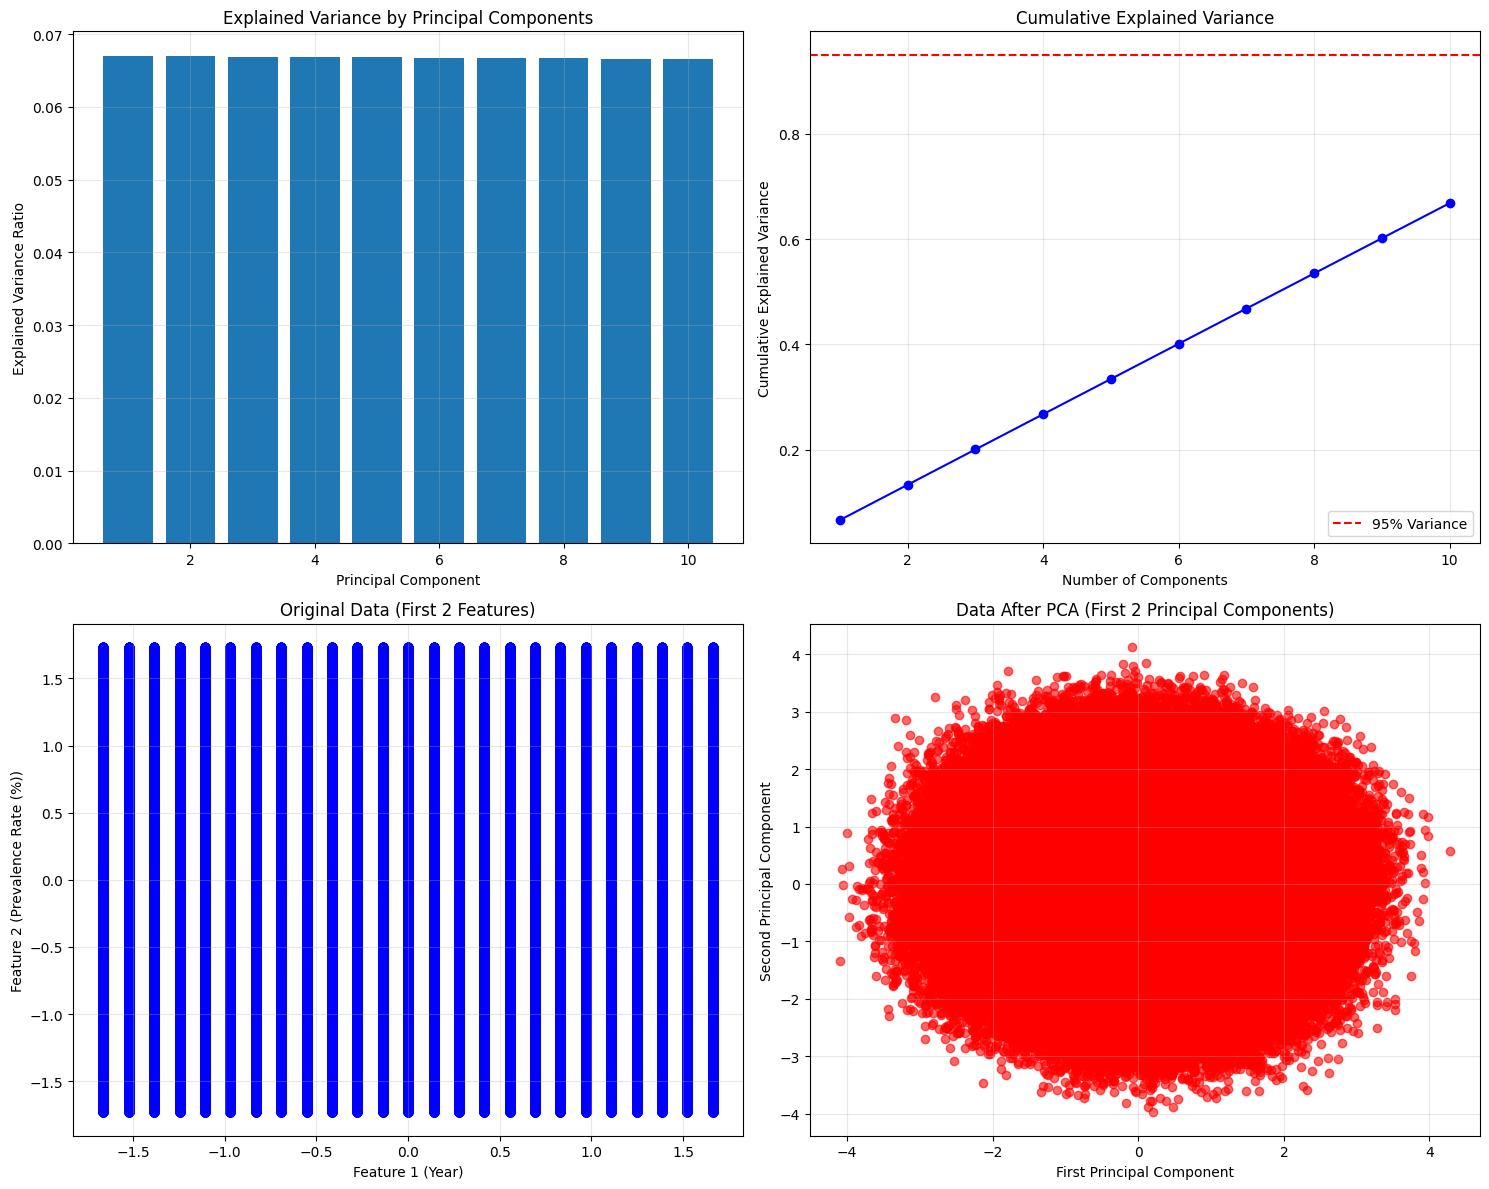


=== PCA SUMMARY ===
Original dataset: 1000000 samples, 15 features
Reduced dataset: 1000000 samples, 10 features
Dimensionality reduction: 33.3%
Variance retained: 66.80%

Top 5 Principal Components (Eigenvalues):
PC1: 1.0057 (6.70% variance)
PC2: 1.0042 (6.69% variance)
PC3: 1.0036 (6.69% variance)
PC4: 1.0029 (6.69% variance)
PC5: 1.0020 (6.68% variance)


In [10]:
# Step 8: Visualize Before and After PCA
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Explained Variance Ratio
ax1.bar(range(1, len(explained_variance_ratio[:10])+1), explained_variance_ratio[:10])
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance Ratio')
ax1.set_title('Explained Variance by Principal Components')
ax1.grid(True, alpha=0.3)

# Plot 2: Cumulative Explained Variance
ax2.plot(range(1, len(cumulative_variance_ratio[:10])+1), cumulative_variance_ratio[:10], 'bo-')
ax2.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
ax2.set_xlabel('Number of Components')
ax2.set_ylabel('Cumulative Explained Variance')
ax2.set_title('Cumulative Explained Variance')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Original data (first two features for simplicity)
ax3.scatter(standardized_data[:, 0], standardized_data[:, 1], alpha=0.6, c='blue')
ax3.set_xlabel(f'Feature 1 ({numerical_cols[0]})')
ax3.set_ylabel(f'Feature 2 ({numerical_cols[1]})')
ax3.set_title('Original Data (First 2 Features)')
ax3.grid(True, alpha=0.3)

# Plot 4: Reduced data after PCA (first two principal components)
ax4.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.6, c='red')
ax4.set_xlabel('First Principal Component')
ax4.set_ylabel('Second Principal Component')
ax4.set_title('Data After PCA (First 2 Principal Components)')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary Statistics
print("\n=== PCA SUMMARY ===")
print(f"Original dataset: {data.shape[0]} samples, {data.shape[1]} features")
print(f"Reduced dataset: {reduced_data.shape[0]} samples, {reduced_data.shape[1]} features")
print(f"Dimensionality reduction: {((data.shape[1] - reduced_data.shape[1]) / data.shape[1] * 100):.1f}%")
print(f"Variance retained: {cumulative_variance_ratio[num_components-1]*100:.2f}%")
print(f"\nTop 5 Principal Components (Eigenvalues):")
for i in range(min(5, len(sorted_eigenvalues))):
    print(f"PC{i+1}: {sorted_eigenvalues[i]:.4f} ({explained_variance_ratio[i]*100:.2f}% variance)")

In [11]:
# Additional Analysis: Component Loadings
print("\n=== PRINCIPAL COMPONENT LOADINGS ===")
print("(Shows which original features contribute most to each PC)\n")

# Display loadings for first 3 principal components
for pc in range(min(3, num_components)):
    print(f"Principal Component {pc+1} (Variance: {explained_variance_ratio[pc]*100:.2f}%):")
    
    # Get loadings (eigenvector values)
    loadings = sorted_eigenvectors[:, pc]
    
    # Get indices of top contributing features
    top_indices = np.argsort(np.abs(loadings))[::-1][:5]
    
    print("Top 5 contributing features:")
    for idx in top_indices:
        print(f"  {numerical_cols[idx]}: {loadings[idx]:.4f}")
    print()


=== PRINCIPAL COMPONENT LOADINGS ===
(Shows which original features contribute most to each PC)

Principal Component 1 (Variance: 6.70%):
Top 5 contributing features:
  Average Treatment Cost (USD): 0.4537
  Population Affected: 0.4490
  Hospital Beds per 1000: -0.3410
  Education Index: 0.3344
  Healthcare Access (%): 0.2677

Principal Component 2 (Variance: 6.69%):
Top 5 contributing features:
  Recovery Rate (%): 0.5332
  Urbanization Rate (%): 0.5170
  Doctors per 1000: -0.3175
  Improvement in 5 Years (%): 0.2915
  Education Index: -0.2502

Principal Component 3 (Variance: 6.69%):
Top 5 contributing features:
  Prevalence Rate (%): 0.4965
  Incidence Rate (%): 0.4814
  Population Affected: 0.3131
  Year: -0.3077
  Per Capita Income (USD): 0.2893

